In [85]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import torchvision as tv
import torchvision.transforms as transforms

In [87]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    ]
)

batch_size = 4


trainset = tv.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = tv.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

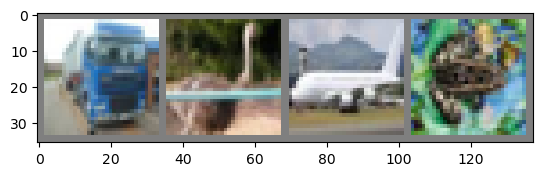

truck  bird plane  frog


In [89]:
def imshow(img):
    img = img / 2 + .5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(batch_size)))

In [91]:
import torch.nn as nn
import torch.nn.functional as F

In [93]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [103]:
net = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [105]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [107]:
for epoch in range(30):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 2000 == 1999:
            print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0


print("Finish Training!")

[1,  2000] loss: 2.216
[1,  4000] loss: 1.861
[1,  6000] loss: 1.677
[1,  8000] loss: 1.589
[1, 10000] loss: 1.510
[1, 12000] loss: 1.482
[2,  2000] loss: 1.389
[2,  4000] loss: 1.361
[2,  6000] loss: 1.347
[2,  8000] loss: 1.306
[2, 10000] loss: 1.312
[2, 12000] loss: 1.289
[3,  2000] loss: 1.204
[3,  4000] loss: 1.205
[3,  6000] loss: 1.210
[3,  8000] loss: 1.198
[3, 10000] loss: 1.183
[3, 12000] loss: 1.192
[4,  2000] loss: 1.096
[4,  4000] loss: 1.122
[4,  6000] loss: 1.097
[4,  8000] loss: 1.114
[4, 10000] loss: 1.113
[4, 12000] loss: 1.102
[5,  2000] loss: 1.031
[5,  4000] loss: 1.027
[5,  6000] loss: 1.037
[5,  8000] loss: 1.037
[5, 10000] loss: 1.059
[5, 12000] loss: 1.050
[6,  2000] loss: 0.971
[6,  4000] loss: 0.967
[6,  6000] loss: 0.979
[6,  8000] loss: 1.002
[6, 10000] loss: 1.001
[6, 12000] loss: 0.981
[7,  2000] loss: 0.912
[7,  4000] loss: 0.919
[7,  6000] loss: 0.935
[7,  8000] loss: 0.952
[7, 10000] loss: 0.954
[7, 12000] loss: 0.978
[8,  2000] loss: 0.860
[8,  4000] 

In [109]:
torch.save(net.state_dict(), "./net.pth")

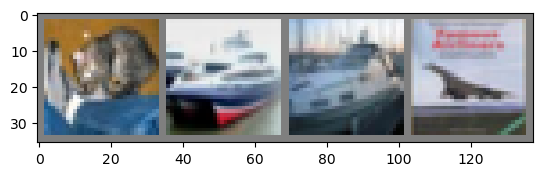

  cat  ship  ship plane


In [111]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

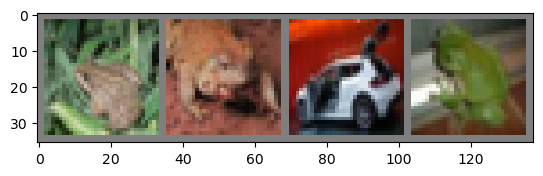

 frog  frog   car  frog


In [113]:
images, labels = next(dataiter)

imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

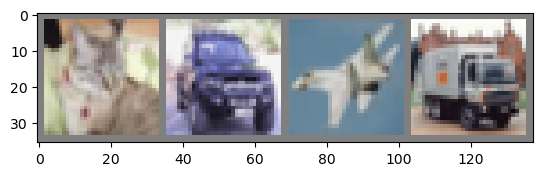

  cat   car plane truck


In [115]:
images, labels = next(dataiter)

imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

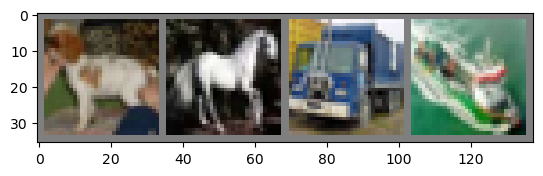

  dog horse truck  ship


In [117]:
images, labels = next(dataiter)

imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

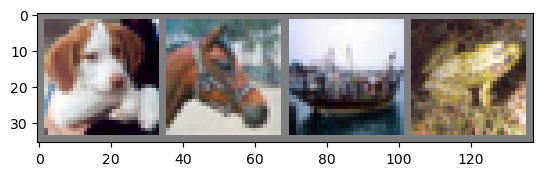

  dog horse  ship  frog


In [119]:
images, labels = next(dataiter)

imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

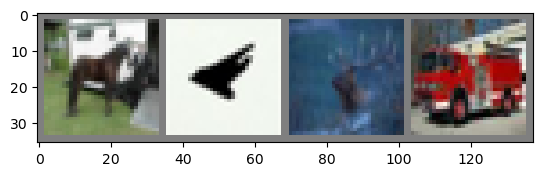

horse plane  deer truck


In [121]:
images, labels = next(dataiter)

imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

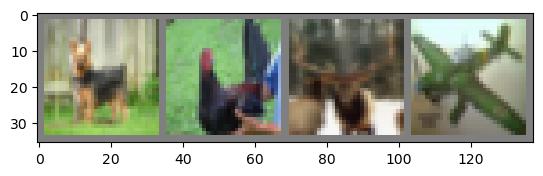

  dog  bird  deer plane


In [123]:
images, labels = next(dataiter)

imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

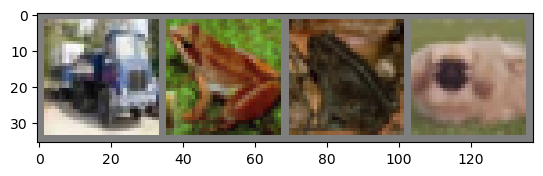

truck  frog  frog   dog


In [125]:
images, labels = next(dataiter)

imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

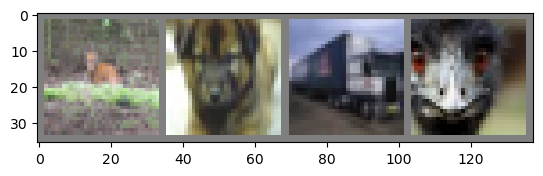

 deer   dog truck  bird


In [127]:
images, labels = next(dataiter)

imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

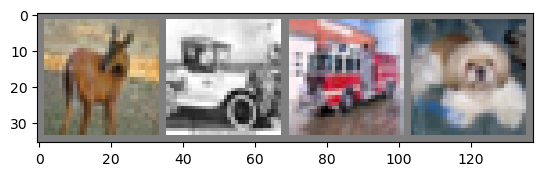

 deer   car truck   dog


In [129]:
images, labels = next(dataiter)

imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

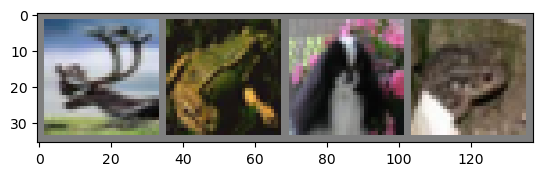

 deer  frog   dog  frog


In [131]:
images, labels = next(dataiter)

imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

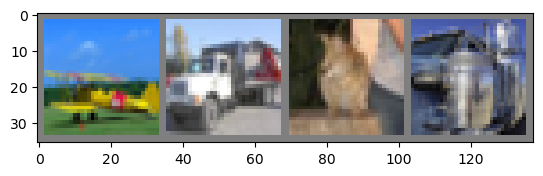

plane truck   cat truck


In [133]:
images, labels = next(dataiter)

imshow(tv.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

In [135]:
net = Net()
net.load_state_dict(torch.load("./net.pth"))


<All keys matched successfully>

In [137]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print(f"Accuracy: {100 * correct / total}")

Accuracy: 58.61


In [139]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)